# HW06: Word Embeddings

In [5]:
from bugs import *

**Training word2vec**

In this section, we train a word2vec model using gensim. We train the model on text8 (which consists of the first 90M characters of a Wikipedia dump from 2006 and is considered one of the benchmarks for evaluating language models).

In [1]:
import gensim.downloader as api

api.info("text8")

{'num_records': 1701,
 'record_format': 'list of str (tokens)',
 'file_size': 33182058,
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/text8/__init__.py',
 'license': 'not found',
 'description': 'First 100,000,000 bytes of plain text from Wikipedia. Used for testing purposes; see wiki-english-* for proper full Wikipedia datasets.',
 'checksum': '68799af40b6bda07dfa47a32612e5364',
 'file_name': 'text8.gz',
 'read_more': ['http://mattmahoney.net/dc/textdata.html'],
 'parts': 1}

In [2]:
dataset = api.load("text8")

[==================================================] 100.0% 31.6/31.6MB downloaded


In [6]:
pd.Series(dataset)

0       [anarchism, originated, as, a, term, of, abuse...
1       [reciprocity, qualitative, impairments, in, co...
2       [with, the, aegis, of, zeus, when, he, goes, t...
3       [despite, his, injury, booth, managed, to, lim...
4       [present, best, sound, editing, one, nine, six...
                              ...                        
1696    [the, format, although, there, are, several, t...
1697    [if, either, party, disagreed, neutrality, if,...
1698    [and, chicago, are, first, and, second, respec...
1699    [four, five, four, eight, four, nine, five, ze...
1700    [find, list, of, once, popular, beliefs, or, b...
Length: 1701, dtype: object

In [48]:
from gensim.models import Word2Vec

## train a word2vec model on this dataset, only consider words which appear at least 10 times in the corpus
w2v = Word2Vec(sentences=dataset, size=100, window=5, min_count=10, workers=4)

In [98]:
('chicago' in w2v.wv) and print(w2v.wv['chicago'])
('new york' in w2v.wv) and print(w2v.wv['new york'])

[-4.3227550e-01  5.6277633e-01 -1.0429916e+00 -3.7942231e-01
 -5.2935523e-01  8.6276776e-01  8.9858907e-01 -1.0088720e+00
 -1.8757743e-01 -1.0058062e+00  7.6962584e-01 -2.1975992e+00
 -7.0452428e-01 -1.7538410e+00  1.4810233e+00  1.4135089e+00
 -1.2950332e+00 -5.0164777e-01  5.2846628e-01 -1.5540269e-01
  6.7168266e-01 -2.2014272e-01  7.0358652e-01  1.2800006e+00
  2.8245823e+00  1.1049114e+00 -4.4763768e-01 -6.1892647e-01
  2.8322154e-01 -4.1683170e-01 -1.2748804e+00  2.6536357e+00
  5.4158592e-01 -2.0302209e-01  4.9119198e-01  5.6505251e-01
  5.4355091e-01 -3.2546329e-01 -3.4402728e-01  1.0996366e+00
  3.2327604e-01 -1.2737602e+00  1.1619599e+00 -7.9590523e-01
  1.0875634e+00  2.9534557e-01 -4.0574190e-01  6.4325362e-01
 -2.7811997e-02  1.5465130e+00  6.8249531e-02  5.1378900e-01
  3.8961675e-02 -1.3011607e+00 -3.8884841e-02  2.0375533e+00
  1.6830353e+00  5.0253862e-01  1.2723858e+00  1.8607781e+00
  1.2559603e+00  5.0046039e-01  6.1060268e-01 -5.9959531e-01
  7.2832227e-02 -1.51282

False

**Word Similarities**

gensim models provide almost all the utility you might want to wish for to perform standard word similarity tasks. They are available in the .wv (wordvectors) attribute of the model, more details could be found [here](https://radimrehurek.com/gensim/models/keyedvectors.html).

In [104]:
## find the closest words to king
## find the closest word for the vector "woman" + "king" - "man"

print(*dict(w2v.wv.most_similar(positive=['king'])))
print(*dict(w2v.wv.most_similar(positive=["woman", "king"], negative=["man"])))
print(*dict(w2v.wv.most_similar(positive=["woman", "king"], negative=["human"])))
print(*dict(w2v.wv.most_similar(positive=["us", "city", "manhattan"], negative=["chicago"])))

prince emperor queen throne kings elector pharaoh sultan constantine regent
queen prince empress princess son daughter emperor throne kings elizabeth
princess prince empress queen son regent daughter isabella nephew consort
docks harbour alaska shipyard gulf lisbon port building jakarta visitors


**Evaluate Word Similarities** 

One common way to evaluate word2vec models are word analogy tasks. Let's check how good our model is on one of those. We consider the [WordSim353](http://alfonseca.org/eng/research/wordsim353.html) benchmark, the task is to determine how similar two words are.

In [42]:
!wget -nc http://alfonseca.org/pubs/ws353simrel.tar.gz

--2021-04-11 12:39:36--  http://alfonseca.org/pubs/ws353simrel.tar.gz
Resolving alfonseca.org (alfonseca.org)... 162.215.249.67
Connecting to alfonseca.org (alfonseca.org)|162.215.249.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5460 (5.3K) [application/x-gzip]
Saving to: ‘ws353simrel.tar.gz’

ws353simrel.tar.gz  100%[===================>]   5.33K  --.-KB/s    in 0.001s  

2021-04-11 12:39:43 (4.92 MB/s) - ‘ws353simrel.tar.gz’ saved [5460/5460]



In [122]:
#!tar xf ws353simrel.tar.gz

path = "wordsim353_sim_rel/wordsim_similarity_goldstandard.txt"

def from_tar(path):
    import tarfile
    import gzip
    with gzip.open("ws353simrel.tar.gz", mode='rb') as gz:
        with tarfile.open(fileobj=gz, mode='r') as tf:
            df = pd.read_table(tf.extractfile(path), header=None, names=["A", "B", "score"])

    return df

df = from_tar(path)
df.A = df.A.str.lower()
df.B = df.B.str.lower()

X = df.drop(columns="score")
y = df.score

print(X.head())

            A      B
0       tiger    cat
1       tiger  tiger
2       plane    car
3       train    car
4  television  radio


In [127]:
## compute how similar the pairs in the WordSim353 are according to our model
## if a word is not present in our model, we assign similarity 0 for the respective text pair

w2v.wv['arafat']
df = df.assign(w2v_sim=df.apply(lambda s: w2v.wv.similarity(s.A, s.B) if ((s.A in w2v.wv) and (s.B in w2v.wv)) else 0, axis=1))

df


,A,B,score,w2v_sim
0,tiger,cat,7.35,0.596897
1,tiger,tiger,10.00,1.000000
2,plane,car,5.77,0.461090
3,train,car,6.31,0.561420
4,television,radio,6.77,0.741943
...,...,...,...,...
198,rooster,voyage,0.62,0.097874
199,noon,string,0.54,0.066645
200,chord,smile,0.54,0.173784
201,professor,cucumber,0.31,0.018948


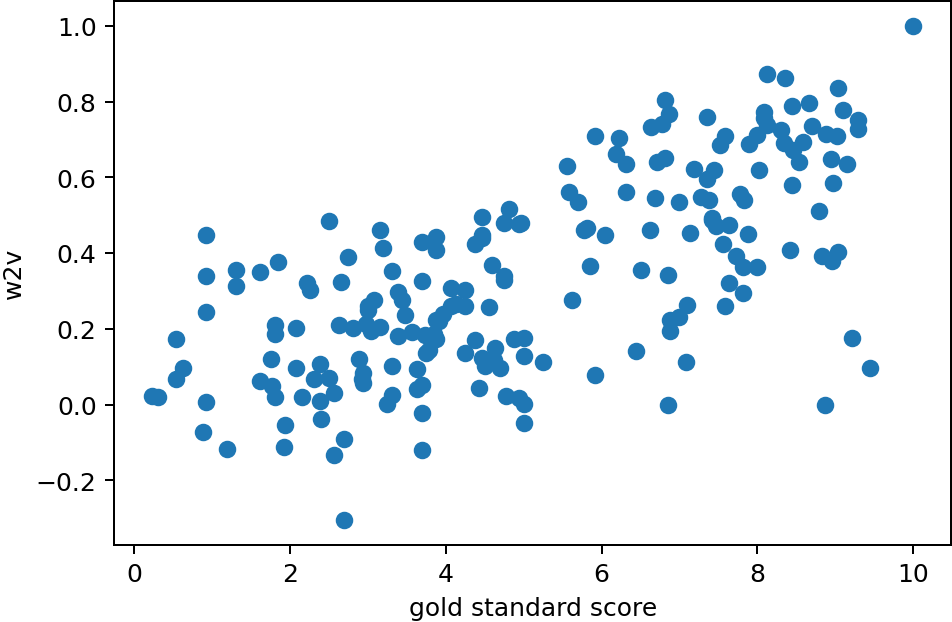

In [133]:
with Plox() as px:
    px.a.scatter(df.score, df.w2v_sim)
    px.a.set_xlabel("gold standard score")
    px.a.set_ylabel("w2v")
    px.show()

In [135]:
from scipy.stats import spearmanr

## compute spearman's rank correlation between our prediction and the human annotations
spearmanr(df.score, df.w2v_sim).correlation

0.6625364427820968

In [156]:
import spacy
spacy_package = 'en_core_web_lg'
nlp = spacy.load(spacy_package)

# https://spacy.io/models/en
# !python -m spacy download en_core_web_lg
# !python -c "import spacy; print(spacy.__file__)"

In [157]:
## compute word similarities in the WordSim353 dataset using spaCy word embeddings
## compute spearman's rank correlation between these similarities and the human annotations

df = df.assign(spacy=df.apply(axis=1, func=lambda s: nlp(s.A).similarity(nlp(s.B))))

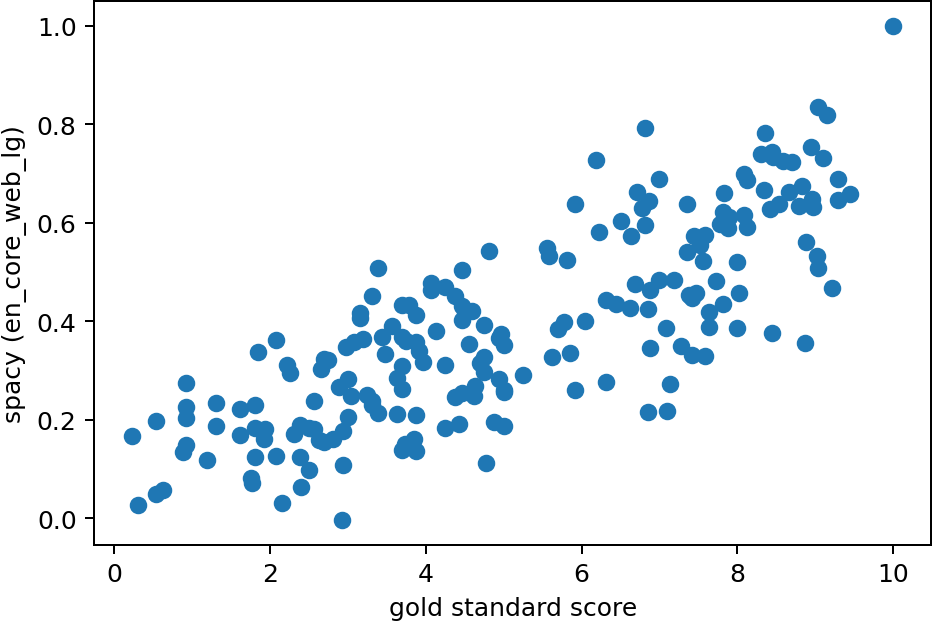

In [158]:
with Plox() as px:
    px.a.scatter(df.score, df.spacy)
    px.a.set_xlabel("gold standard score")
    px.a.set_ylabel(f"spacy ({spacy_package})")
    px.show()

In [159]:
from scipy.stats import spearmanr

## compute spearman's rank correlation between our prediction and the human annotations
spearmanr(df.score, df.spacy).correlation

0.8015441627816334